In [1]:
import numpy as np

### maze

In [2]:
from src.maze import Maze 

# parameters
size_x = 30 # maze width
size_y = 15 # maze height
disp_size = (800, 600) # display size (pixels)
block_size = 10  # block size in pixels

# initialize maze
maze = Maze(size_x=size_x, size_y=size_y)

# visualize settings
maze.screen_size = np.asarray(disp_size)
maze.screen_block_size = np.min(disp_size / np.asarray((size_x, size_y)))
maze.screen_block_offset = (disp_size - maze.screen_block_size * np.flip(maze.block_size)) // 2

# generate maze
maze.gen_maze_2D() # + maze.gen_maze_walls()
display(maze.block_size)
display(maze.wall_size)
display(maze.blocks.shape)

pygame 2.1.0 (SDL 2.0.16, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


array([31, 61], dtype=int64)

array([15, 30], dtype=int64)

(31, 61)

In [3]:
display(maze.blocks)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

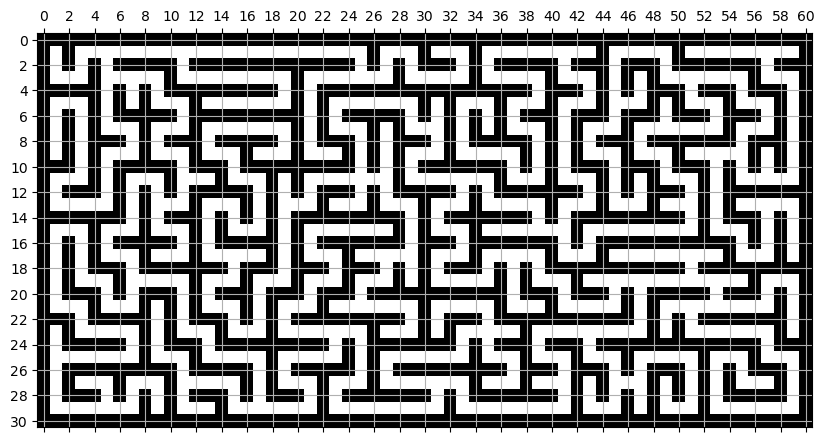

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import spy

plt.figure(figsize=(10, 10))
spy(maze.blocks)
plt.xticks(np.arange(0, maze.blocks.shape[1], 2))
plt.yticks(np.arange(0, maze.blocks.shape[0], 2))
plt.grid(axis='both', which='both')

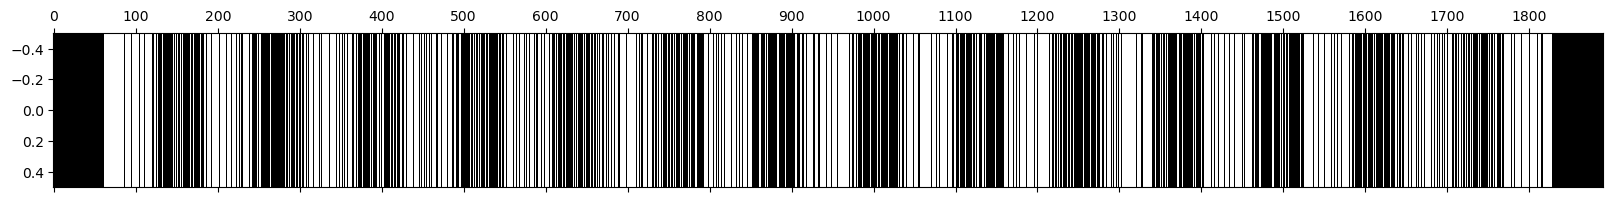

In [5]:
# flattening maze.blocks
flatten_blocks = maze.blocks.flatten().reshape(1, -1)

plt.figure(figsize=(20, 2))
spy(flatten_blocks, aspect='auto')
plt.xticks(np.arange(0, maze.blocks.shape[1] * maze.blocks.shape[0], 100))
plt.show()

### make env

In [6]:
from src.environment import Environment

In [7]:
maze_width = 61
maze_height = 31

env = Environment(maze_width, maze_height)

1
0
1
0
1
1
0
0
1
0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# init environment
"""env = gym.make('matrix_mdp/MatrixMDP-v0', p_0=p_0, p=p, r=r, render_mode="human")
env.reset() # reset the environment to the initial state (mandatory before take an action)
for i in range(10):
    #env.render()
    env.step(1)
    print(env.state)
"""

'env = gym.make(\'matrix_mdp/MatrixMDP-v0\', p_0=p_0, p=p, r=r, render_mode="human")\nenv.reset() # reset the environment to the initial state (mandatory before take an action)\nfor i in range(10):\n    #env.render()\n    env.step(1)\n    print(env.state)\n'